<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica 6 - DISEÑO DE FILTROS DIGITALES </center></font></h2>
<h3><font color='0B5345'> <center>
Diego Andrés Flórez - Daniel Felipe Soto </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

# **Librerías**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz, iirfilter, filtfilt, welch
import numpy as np
from google.colab import drive
import scipy.io as sio


# **4.1. Creación de la señal**

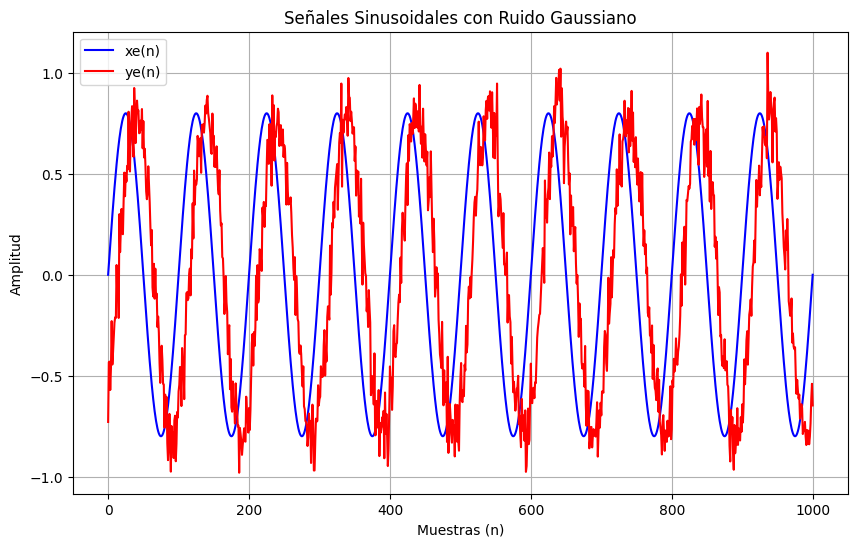

In [51]:
# Parámetros
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal sinusoidal x_e(n)
xe = alpha * np.sin(2 * np.pi * F0 * n)

# Generación del ruido gaussiano w(n)
w = np.random.normal(0, sigma, len(n))

# Señal registrada y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + w

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(n, xe, label='xe(n)', color='blue')
plt.plot(n, ye, label='ye(n)', color='red')
plt.title('Señales Sinusoidales con Ruido Gaussiano')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# **4.2. Diseño de un filtro**

*   Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.




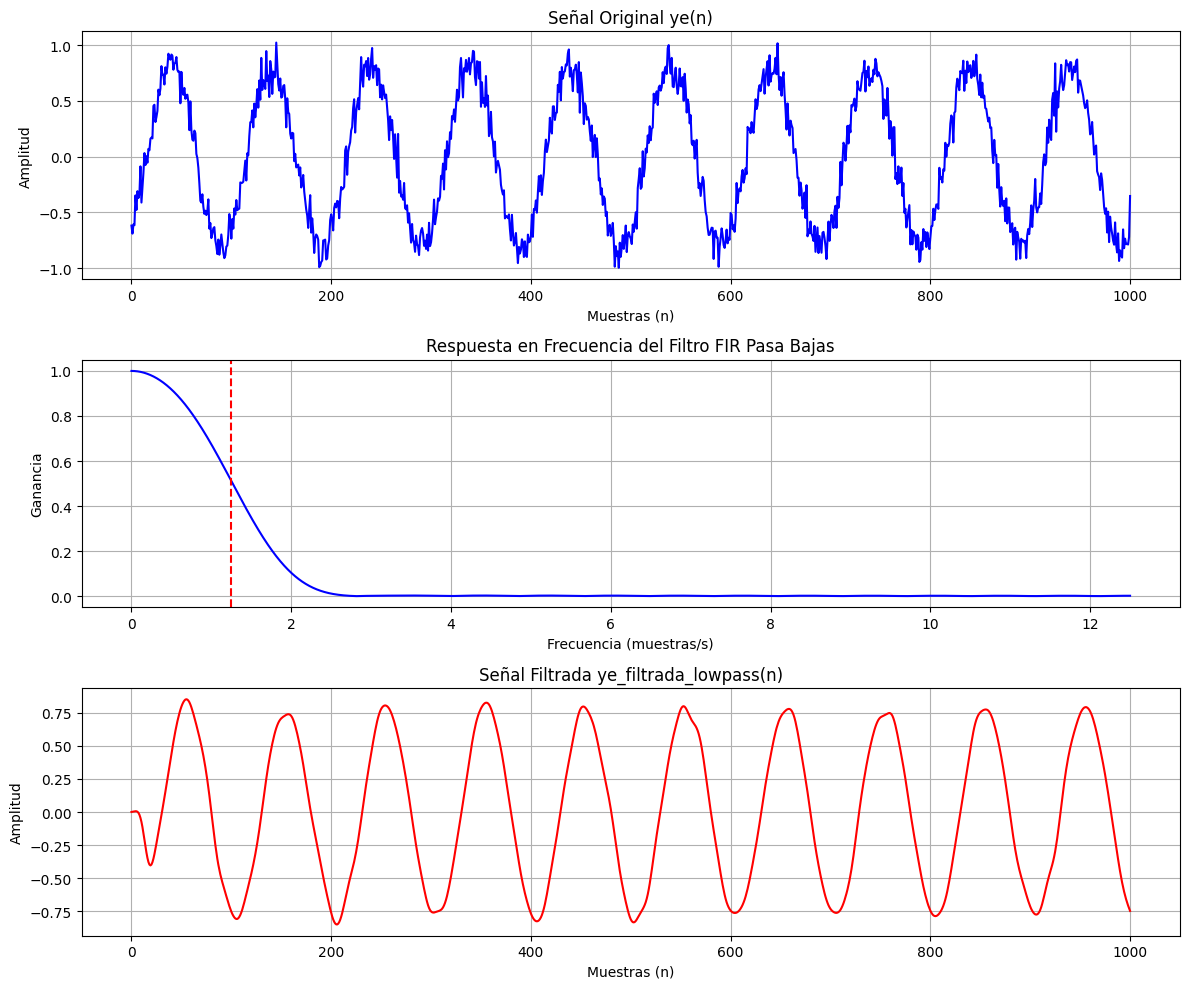

In [52]:
# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Frecuencia de corte normalizada para el filtro pasa bajas
Fc_lowpass = 1.25 / (Fs / 2)  # Frecuencia de corte de 1.25 muestras/s

# Número de coeficientes del filtro
N = 31  # Número impar para evitar errores

# Diseño del filtro FIR pasa bajas
h_lowpass = firwin(N, cutoff=Fc_lowpass, window='hamming')

# Aplicar el filtro pasa bajas a la señal y_e(n)
ye_filtrada_lowpass = lfilter(h_lowpass, 1, ye)

# Gráficos
plt.figure(figsize=(12, 10))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro pasa bajas
plt.subplot(3, 1, 2)
w_lowpass, H_lowpass = freqz(h_lowpass, worN=8000)
plt.plot(0.5*Fs*w_lowpass/np.pi, np.abs(H_lowpass), 'b')
plt.axvline(1.25, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro FIR Pasa Bajas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro FIR pasa bajas
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_lowpass, label='ye_filtrada_lowpass(n)', color='red')
plt.title('Señal Filtrada ye_filtrada_lowpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


* ¿Qué  cambios  hay  en  los  argumentos  de  la  función  para  implementar  un  filtro pasa  banda  y  pasa  altas? Pruebe  con  una  frecuencia  de  corte  adicional  de 7.5 muestras/s.

Para implementar un filtro pasa banda o pasa altas en lugar de un filtro pasa bajas, hay algunos cambios en los argumentos de la función firwin.


**1. Filtro pasa banda:**
Para un filtro pasa banda, necesitamos especificar las frecuencias de corte inferior y superior en lugar de una sola frecuencia de corte. Los cambios necesarios son:

- cutoff: En lugar de especificar un solo valor, ahora necesitamos especificar una tupla de dos valores que representen la frecuencia de corte inferior y superior. Por ejemplo, (Fc1, Fc2).

- pass_zero: Debemos establecer pass_zero en False para indicar que queremos un filtro pasa banda.

**2. Filtro pasa altas:**

Para un filtro pasa altas, n ecesitamos ajustar el número de coeficientes N del filtro para que sea impar, en este caso lo ajustaremos a N=31. Además, necesitamos especificar la frecuencia de corte. Los cambios necesarios son:

- cutoff: Se especifica solo una frecuencia de corte.


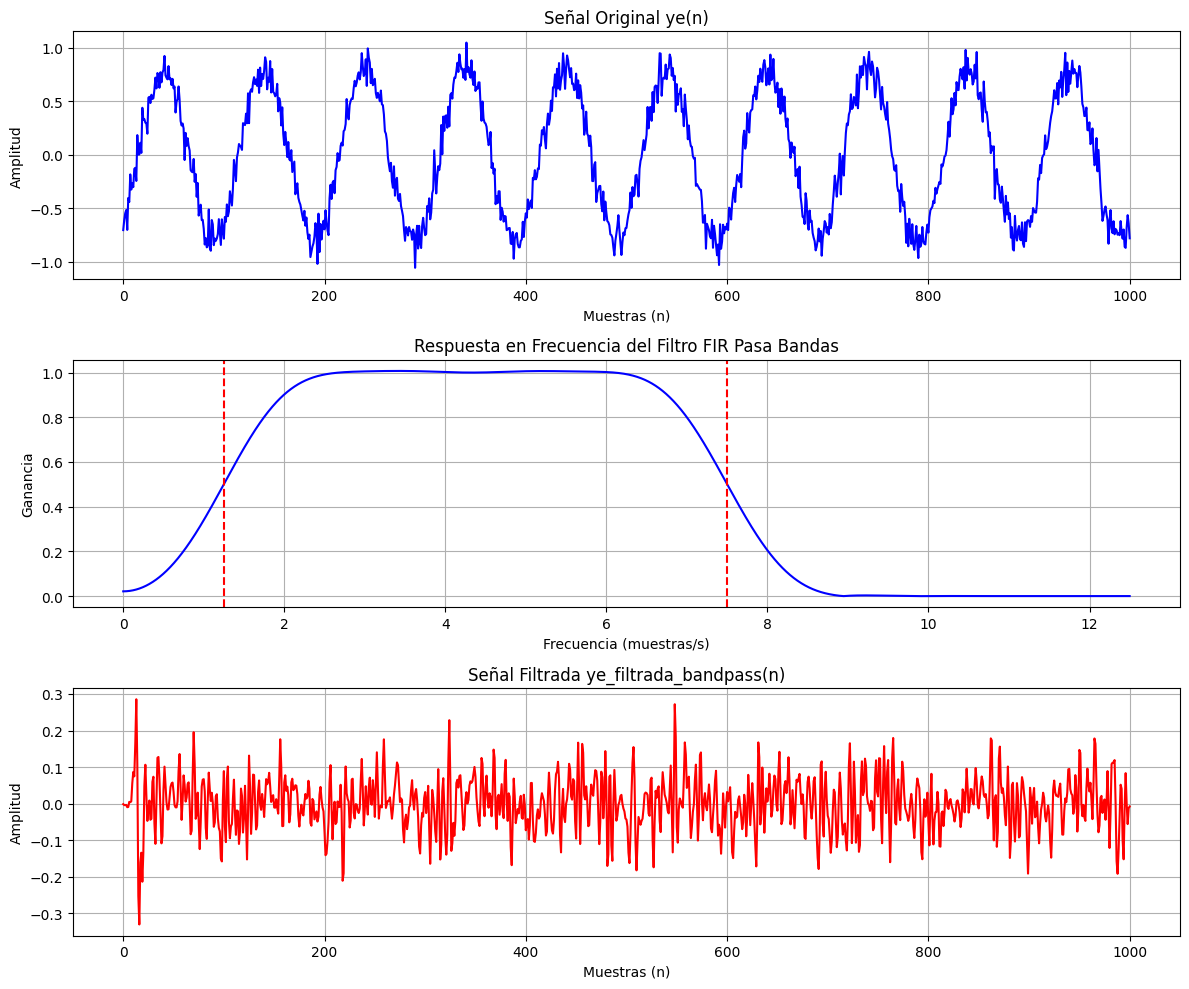

In [53]:
# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Frecuencias de corte normalizadas para el filtro pasa bandas
Fc1_bandpass = 1.25 / (Fs / 2)  # Frecuencia de corte inferior de 1.25 muestras/s
Fc2_bandpass = 7.5 / (Fs / 2)   # Frecuencia de corte superior de 7.5 muestras/s

# Frecuencia de corte normalizada para el filtro pasa bajas
Fc_lowpass = 1.25 / (Fs / 2)  # Frecuencia de corte de 1.25 muestras/s

# Número de coeficientes del filtro
N = 31  # Número impar para evitar errores

# Diseño del filtro FIR pasa bandas
h_bandpass = firwin(N, cutoff=(Fc1_bandpass, Fc2_bandpass), pass_zero=False, window='hamming')



# Aplicar los filtros a la señal y_e(n)
ye_filtrada_bandpass = lfilter(h_bandpass, 1, ye)


# Gráficos
plt.figure(figsize=(12, 10))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro pasa bandas
plt.subplot(3, 1, 2)
w_bandpass, H_bandpass = freqz(h_bandpass, worN=8000)
plt.plot(0.5*Fs*w_bandpass/np.pi, np.abs(H_bandpass), 'b')
plt.axvline(1.25, color='r', linestyle='--')
plt.axvline(7.5, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro FIR Pasa Bandas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro FIR pasa bandas
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_bandpass, label='ye_filtrada_bandpass(n)', color='red')
plt.title('Señal Filtrada ye_filtrada_bandpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)


plt.tight_layout()
plt.show()


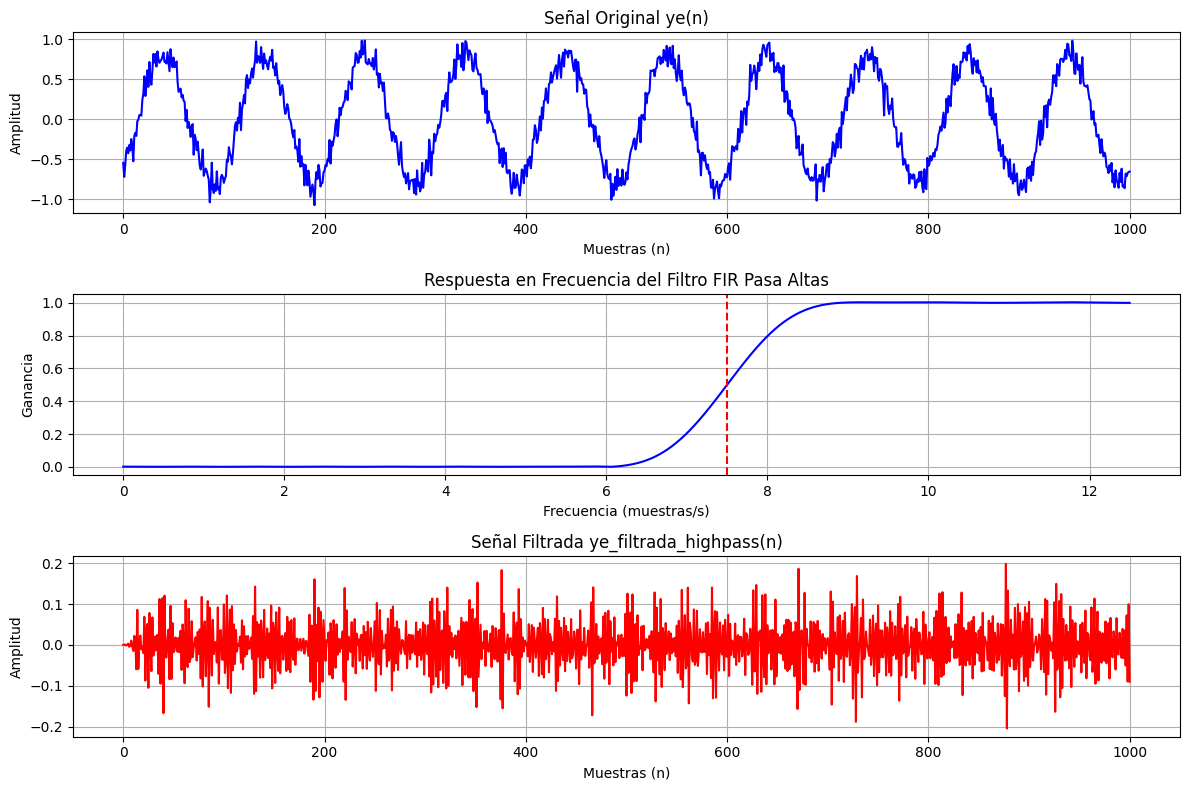

In [54]:
# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Frecuencia de corte normalizada para el filtro pasa altas
Fc_highpass = 7.5 / (Fs / 2)  # Frecuencia de corte de 7.5 muestras/s

# Número de coeficientes del filtro
N = 31  # Número impar para evitar errores

# Diseño del filtro FIR pasa altas
h_highpass = firwin(N, cutoff=Fc_highpass, pass_zero=False, window='hamming')

# Aplicar el filtro pasa altas a la señal y_e(n)
ye_filtrada_highpass = lfilter(h_highpass, 1, ye)

# Gráficos
plt.figure(figsize=(12, 8))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro pasa altas
plt.subplot(3, 1, 2)
w, H = freqz(h_highpass, worN=8000)
plt.plot(0.5*Fs*w/np.pi, np.abs(H), 'b')
plt.axvline(7.5, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro FIR Pasa Altas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro FIR pasa altas
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_highpass, label='ye_filtrada_highpass(n)', color='red')
plt.title('Señal Filtrada ye_filtrada_highpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()



* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

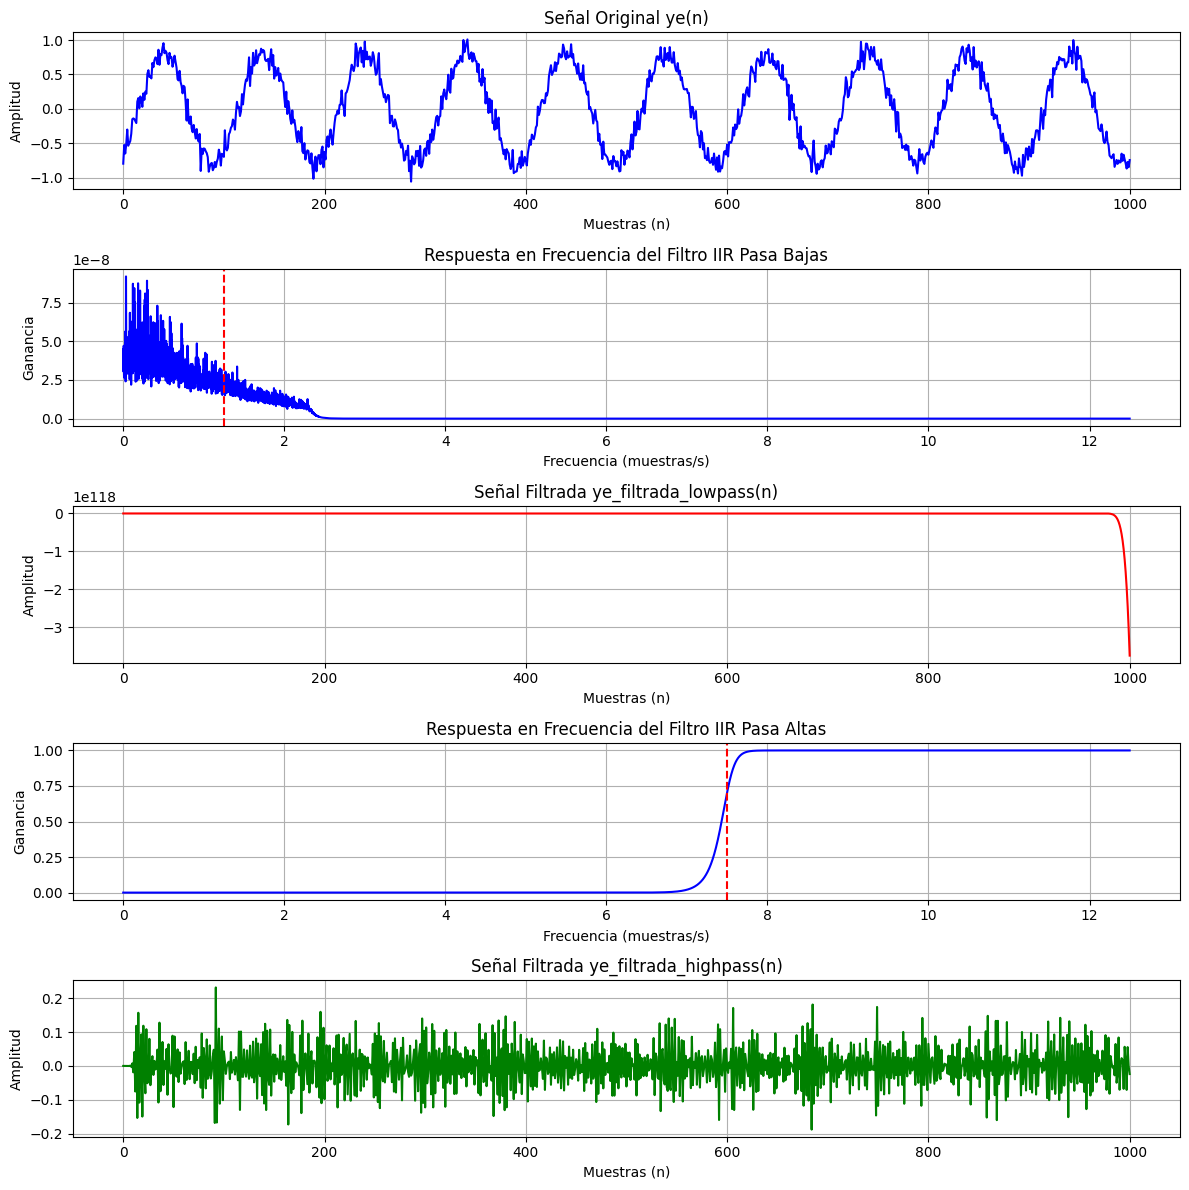

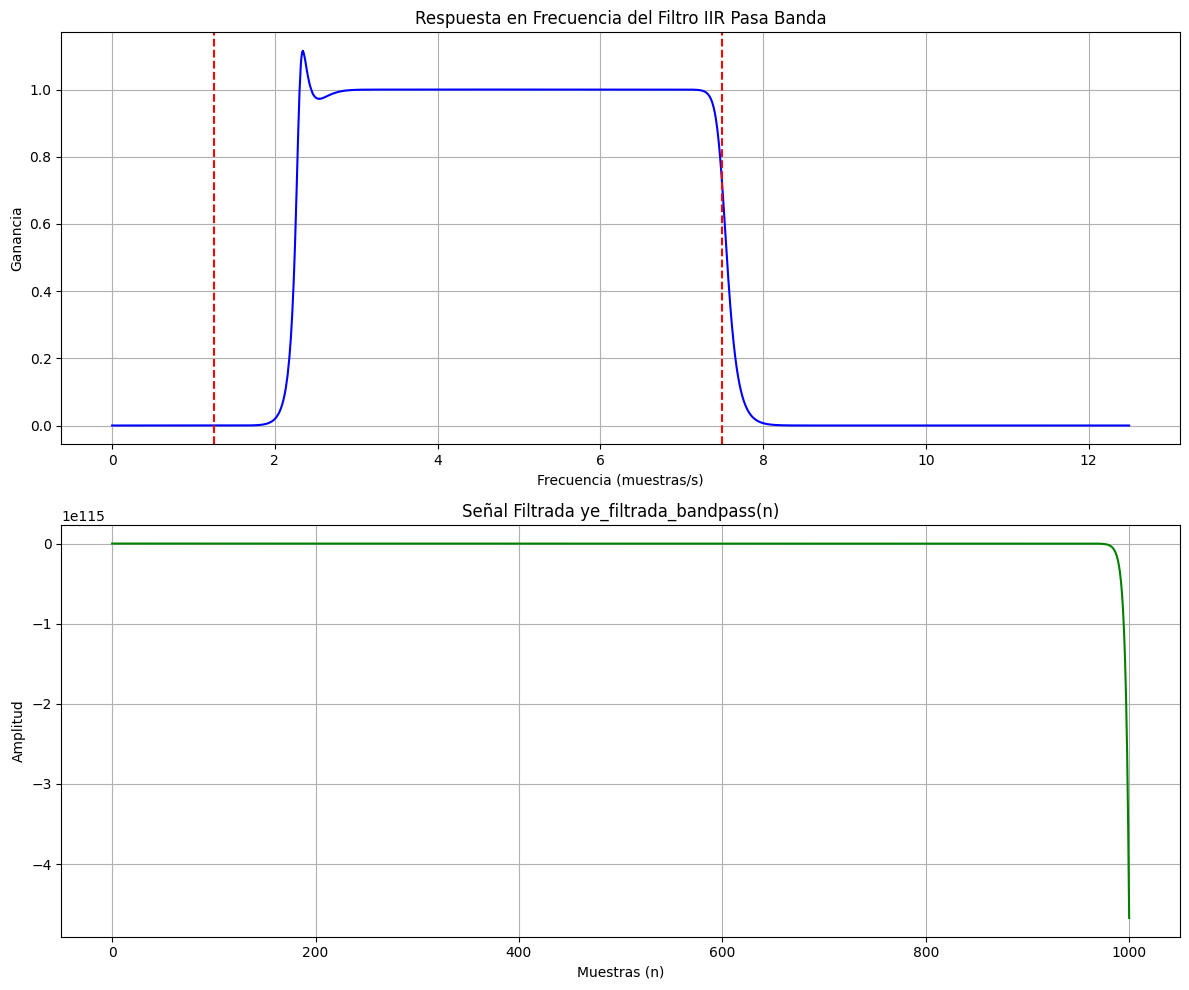

In [70]:
# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Frecuencias de corte para los filtros IIR
Fc_lowpass = 1.25  # Frecuencia de corte de 1.25 muestras/s
Fc_highpass = 7.5  # Frecuencia de corte de 7.5 muestras/s
Fc_bandpass_low = 1.25  # Frecuencia de corte inferior de 1.25 muestras/s
Fc_bandpass_high = 7.5  # Frecuencia de corte superior de 7.5 muestras/s

# Orden del filtro
N = 30  # Orden del filtro

# Diseñar el filtro IIR pasa bajas
b_lowpass, a_lowpass = iirfilter(N, Wn=Fc_lowpass, fs=Fs, btype='lowpass', analog=False, ftype='butter')

# Diseñar el filtro IIR pasa altas
b_highpass, a_highpass = iirfilter(N, Wn=Fc_highpass, fs=Fs, btype='highpass', analog=False, ftype='butter')

# Diseñar el filtro IIR pasa banda
b_bandpass, a_bandpass = iirfilter(N, Wn=[Fc_bandpass_low, Fc_bandpass_high], fs=Fs, btype='band', analog=False, ftype='butter')

# Aplicar los filtros a la señal y_e(n)
ye_filtrada_lowpass = lfilter(b_lowpass, a_lowpass, ye)
ye_filtrada_highpass = lfilter(b_highpass, a_highpass, ye)
ye_filtrada_bandpass = lfilter(b_bandpass, a_bandpass, ye)

# Gráficos
plt.figure(figsize=(12, 12))

# Señal original y_e(n)
plt.subplot(5, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR pasa bajas
plt.subplot(5, 1, 2)
w_lowpass, h_lowpass = freqz(b_lowpass, a_lowpass, worN=8000)
plt.plot(0.5*Fs*w_lowpass/np.pi, np.abs(h_lowpass), 'b')
plt.axvline(1.25, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro IIR Pasa Bajas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro IIR pasa bajas
plt.subplot(5, 1, 3)
plt.plot(n, ye_filtrada_lowpass, label='ye_filtrada_lowpass(n)', color='red')
plt.title('Señal Filtrada ye_filtrada_lowpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR pasa altas
plt.subplot(5, 1, 4)
w_highpass, h_highpass = freqz(b_highpass, a_highpass, worN=8000)
plt.plot(0.5*Fs*w_highpass/np.pi, np.abs(h_highpass), 'b')
plt.axvline(7.5, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro IIR Pasa Altas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro IIR pasa altas
plt.subplot(5, 1, 5)
plt.plot(n, ye_filtrada_highpass, label='ye_filtrada_highpass(n)', color='green')
plt.title('Señal Filtrada ye_filtrada_highpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráficos para el filtro pasa banda
plt.figure(figsize=(12, 10))


# Respuesta en frecuencia del filtro IIR pasa banda
plt.subplot(2, 1, 1)
w_bandpass, h_bandpass = freqz(b_bandpass, a_bandpass, worN=8000)
plt.plot(0.5*Fs*w_bandpass/np.pi, np.abs(h_bandpass), 'b')
plt.axvline(1.25, color='r', linestyle='--')
plt.axvline(7.5, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro IIR Pasa Banda")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro IIR pasa banda
plt.subplot(2, 1, 2)
plt.plot(n, ye_filtrada_bandpass, label='ye_filtrada_bandpass(n)', color='green')
plt.title('Señal Filtrada ye_filtrada_bandpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


Si se conservan las mismas caracteristicas que en el filtro FIR, especialmente el orden del filtro (N=30) obtienen graficos desproporcionado de la señal filtrada y de la respuesta en frecuencia al filtro (presencia de ruido). Esto puede deberse a que los filtros IIR pueden ser menos estables que los filtros FIR, especialmente cuando se utilizan órdenes altos. La inestabilidad puede provocar efectos no deseados en la señal filtrada, como amplificación de ruido o distorsión.

Además, los cálculos numéricos involucrados en el filtrado de señales con filtros IIR pueden ser más sensibles a problemas de precisión numérica que los filtros FIR, especialmente cuando se utilizan órdenes altos. Esto podría resultar en comportamientos inesperados o desproporcionados en la señal filtrada.


# **Si disminuimos el orden del filtro a N=4:**

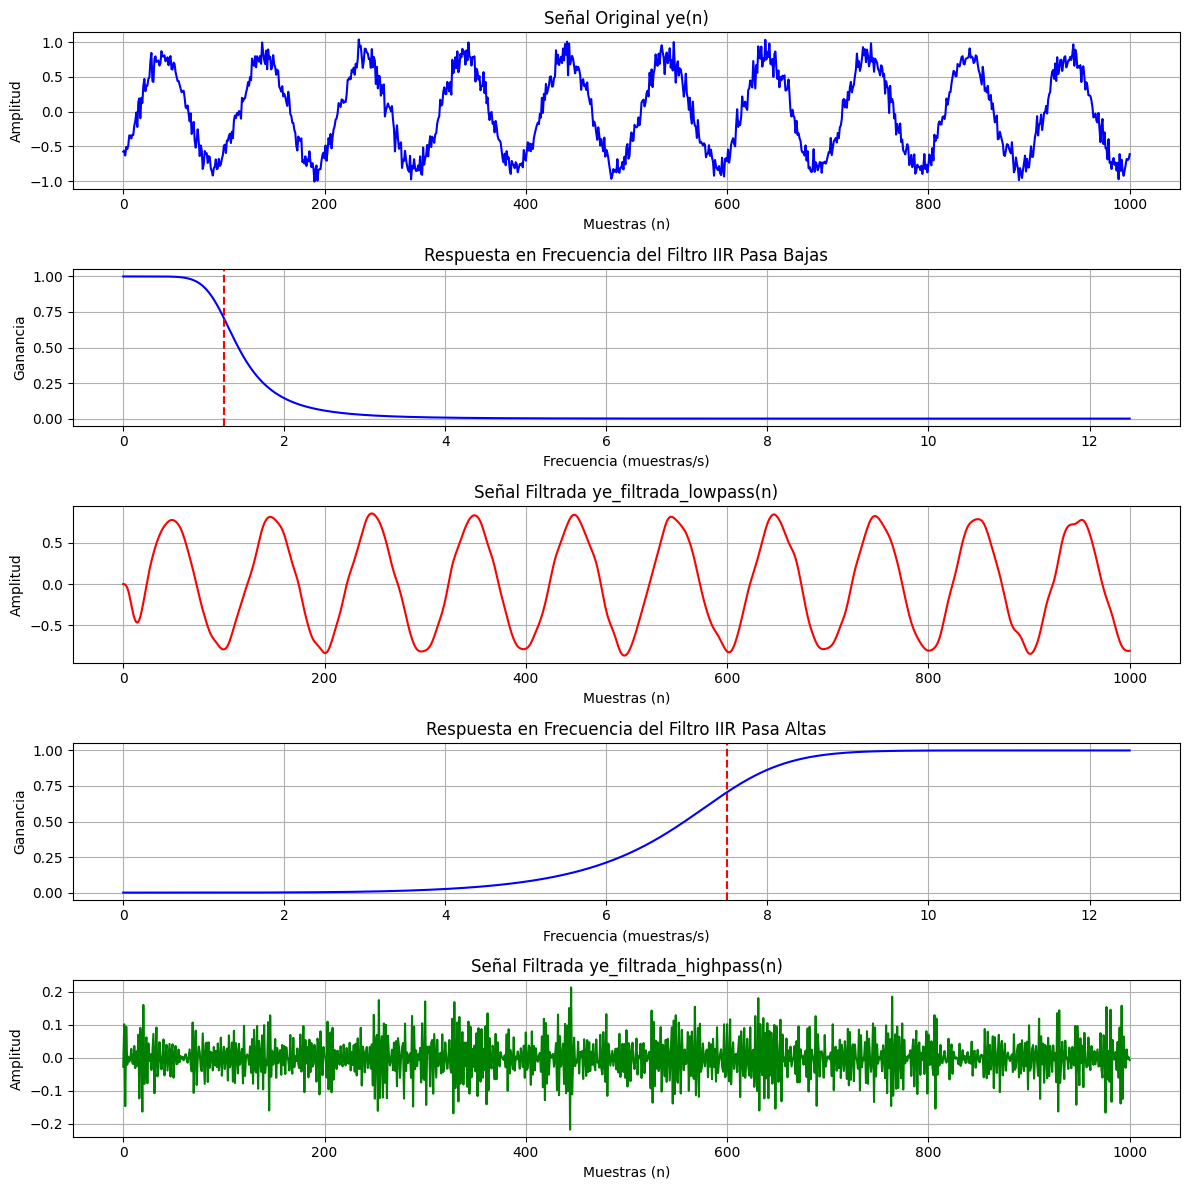

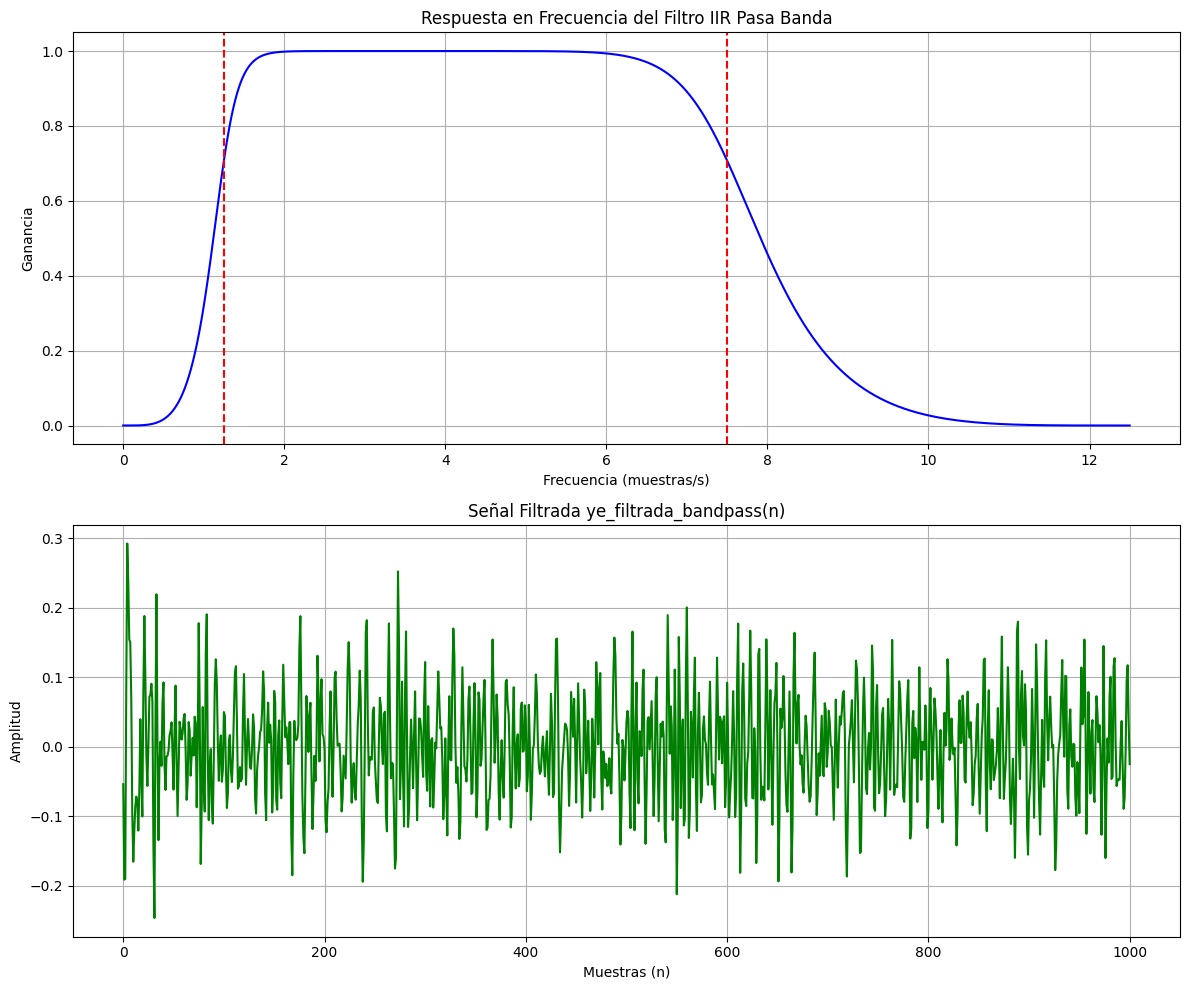

In [79]:
# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Frecuencias de corte para los filtros IIR
Fc_lowpass = 1.25  # Frecuencia de corte de 1.25 muestras/s
Fc_highpass = 7.5  # Frecuencia de corte de 7.5 muestras/s
Fc_bandpass_low = 1.25  # Frecuencia de corte inferior de 1.25 muestras/s
Fc_bandpass_high = 7.5  # Frecuencia de corte superior de 7.5 muestras/s

# Orden del filtro
N = 4  # Orden del filtro

# Diseñar el filtro IIR pasa bajas
b_lowpass, a_lowpass = iirfilter(N, Wn=Fc_lowpass, fs=Fs, btype='lowpass', analog=False, ftype='butter')

# Diseñar el filtro IIR pasa altas
b_highpass, a_highpass = iirfilter(N, Wn=Fc_highpass, fs=Fs, btype='highpass', analog=False, ftype='butter')

# Diseñar el filtro IIR pasa banda
b_bandpass, a_bandpass = iirfilter(N, Wn=[Fc_bandpass_low, Fc_bandpass_high], fs=Fs, btype='band', analog=False, ftype='butter')

# Aplicar los filtros a la señal y_e(n)
ye_filtrada_lowpass = lfilter(b_lowpass, a_lowpass, ye)
ye_filtrada_highpass = lfilter(b_highpass, a_highpass, ye)
ye_filtrada_bandpass = lfilter(b_bandpass, a_bandpass, ye)

# Gráficos
plt.figure(figsize=(12, 12))

# Señal original y_e(n)
plt.subplot(5, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR pasa bajas
plt.subplot(5, 1, 2)
w_lowpass, h_lowpass = freqz(b_lowpass, a_lowpass, worN=8000)
plt.plot(0.5*Fs*w_lowpass/np.pi, np.abs(h_lowpass), 'b')
plt.axvline(1.25, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro IIR Pasa Bajas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro IIR pasa bajas
plt.subplot(5, 1, 3)
plt.plot(n, ye_filtrada_lowpass, label='ye_filtrada_lowpass(n)', color='red')
plt.title('Señal Filtrada ye_filtrada_lowpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR pasa altas
plt.subplot(5, 1, 4)
w_highpass, h_highpass = freqz(b_highpass, a_highpass, worN=8000)
plt.plot(0.5*Fs*w_highpass/np.pi, np.abs(h_highpass), 'b')
plt.axvline(7.5, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro IIR Pasa Altas")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro IIR pasa altas
plt.subplot(5, 1, 5)
plt.plot(n, ye_filtrada_highpass, label='ye_filtrada_highpass(n)', color='green')
plt.title('Señal Filtrada ye_filtrada_highpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráficos para el filtro pasa banda
plt.figure(figsize=(12, 10))


# Respuesta en frecuencia del filtro IIR pasa banda
plt.subplot(2, 1, 1)
w_bandpass, h_bandpass = freqz(b_bandpass, a_bandpass, worN=8000)
plt.plot(0.5*Fs*w_bandpass/np.pi, np.abs(h_bandpass), 'b')
plt.axvline(1.25, color='r', linestyle='--')
plt.axvline(7.5, color='r', linestyle='--')
plt.title("Respuesta en Frecuencia del Filtro IIR Pasa Banda")
plt.xlabel('Frecuencia (muestras/s)')
plt.ylabel('Ganancia')
plt.grid()

# Señal filtrada y_e(n) después de pasar por el filtro IIR pasa banda
plt.subplot(2, 1, 2)
plt.plot(n, ye_filtrada_bandpass, label='ye_filtrada_bandpass(n)', color='green')
plt.title('Señal Filtrada ye_filtrada_bandpass(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# **4.3.Filtrado**



*   Pruebe  dichos  comandos utilizando  la  información  entregada  por el  filtro  pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛)¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de  las  funciones  de  filtrado? ¿Cómo  se puede  explicar  la  falta  de  coincidencia? ¿Es adecuado el orden del filtro usado? Analice.





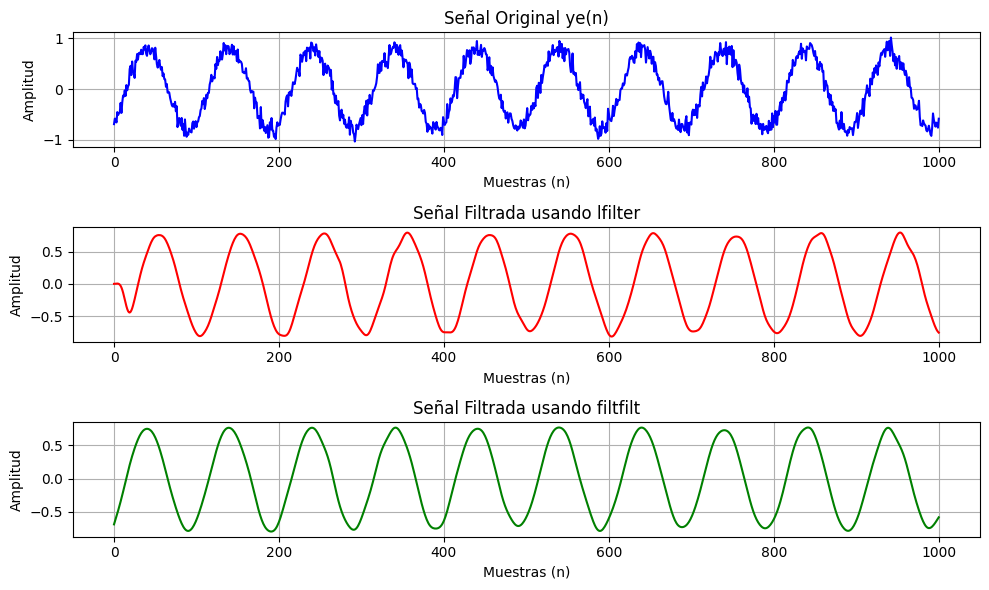

In [82]:
import numpy as np
from scipy.signal import lfilter, filtfilt, firwin
import matplotlib.pyplot as plt

# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Orden del filtro
N = 30  # Orden del filtro

# Frecuencia de corte para el filtro pasa bajas
Fc_lowpass = 1.25  # Frecuencia de corte de 1.25 muestras/s

# Coeficientes del filtro pasa bajas FIR
b_lowpass = firwin(N, cutoff=Fc_lowpass, fs=Fs, pass_zero=True)

# Filtrado usando lfilter
ye_filtrada_lfilter = lfilter(b_lowpass, 1, ye)

# Filtrado usando filtfilt
ye_filtrada_filtfilt = filtfilt(b_lowpass, 1, ye)

# Gráficos
plt.figure(figsize=(10, 6))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando lfilter
plt.subplot(3, 1, 2)
plt.plot(n, ye_filtrada_lfilter, label='ye_filtrada_lfilter(n)', color='red')
plt.title('Señal Filtrada usando lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando filtfilt
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_filtfilt, label='ye_filtrada_filtfilt(n)', color='green')
plt.title('Señal Filtrada usando filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


Cuando utilizamos las funciones lfilter y filtfilt de la biblioteca scipy.signal para filtrar una señal con un filtro FIR, generalmente solo especificamos los coeficientes del numerador del filtro. Esto se debe a que estas funciones están diseñadas para filtrar la señal utilizando la ecuación de diferencia, donde los coeficientes del numerador corresponden a la parte del filtro que multiplica las muestras de la señal de entrada, mientras que los coeficientes del denominador (si existen) corresponden a la parte del filtro que multiplica las muestras de la señal de salida.

En el caso de los filtros FIR (como el filtro pasa bajas que fue implementado), no hay coeficientes en el denominador, ya que no hay realimentación en el sistema. Por lo tanto, solo necesitamos especificar los coeficientes del numerador al utilizar las funciones lfilter y filtfilt para aplicar el filtro FIR.

Los cambios en el uso de estas funciones pueden deberse a varias razones:

* Efectos de borde: lfilter y filtfilt pueden manejar los efectos de borde de manera diferente. lfilter aplica el filtro una vez, lo que puede causar artefactos al principio y al final de la señal. filtfilt aplica el filtro dos veces (en direcciones opuestas), lo que reduce los efectos de borde.

* Estabilidad del filtro: Los filtros IIR pueden ser inestables si no se diseñan correctamente, lo que puede conducir a resultados no deseados o inesperados.

* Orden del filtro: El orden del filtro puede influir en la precisión y el rendimiento del filtrado. Un orden demasiado bajo puede resultar en una mala supresión de frecuencias no deseadas, mientras que un orden demasiado alto puede aumentar la complejidad computacional sin proporcionar beneficios significativos en el filtrado.

En cuanto a la falta de coincidencia entre las señales filtradas, esto podría explicarse por las diferencias en la implementación de las funciones de filtrado, los efectos de borde, la estabilidad del filtro y el orden del filtro. Es importante asegurarse de que el diseño del filtro y la implementación del filtrado sean adecuados para las características de la señal y los requisitos de filtrado específicos.

El orden del filtro empleado resultó ser adecuado ya que mejoró la precisión del filtrado a diferencia de los resultados obtenidos con ordenes de filtro bajos, en donde se obtuvo la presencia de mayores artefactos y ruidos en la señal, como se muestra a continuación en el siguiente ejemplo:

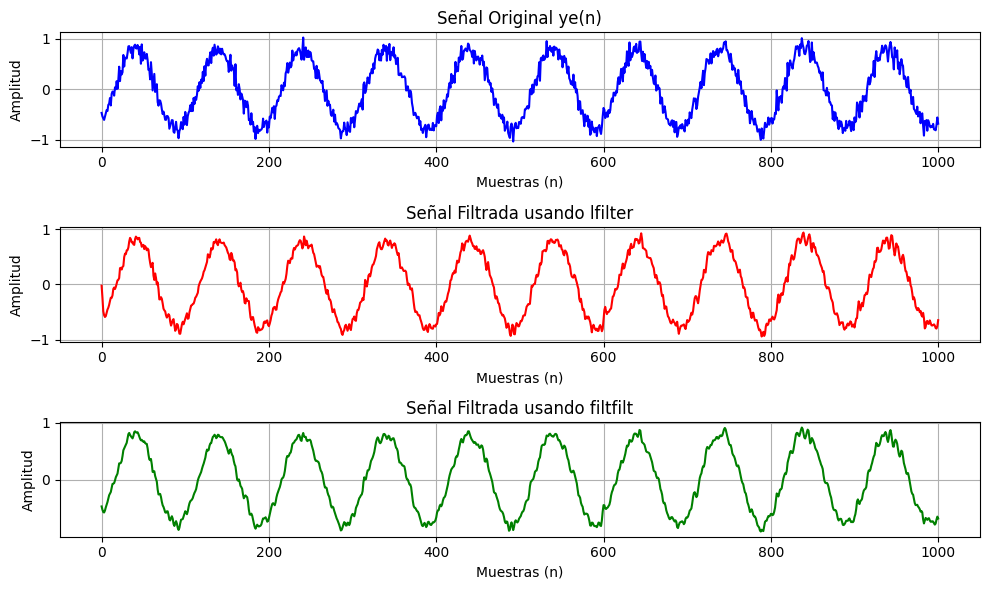

In [83]:
# Definir la señal y_e(n) (usando los valores dados en la pregunta anterior)
Fs = 25  # Frecuencia de muestreo en Hz
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano

# Generación de la señal y_e(n)
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Orden del filtro
N = 4  # Orden del filtro

# Frecuencia de corte para el filtro pasa bajas
Fc_lowpass = 1.25  # Frecuencia de corte de 1.25 muestras/s

# Coeficientes del filtro pasa bajas FIR
b_lowpass = firwin(N, cutoff=Fc_lowpass, fs=Fs, pass_zero=True)

# Filtrado usando lfilter
ye_filtrada_lfilter = lfilter(b_lowpass, 1, ye)

# Filtrado usando filtfilt
ye_filtrada_filtfilt = filtfilt(b_lowpass, 1, ye)

# Gráficos
plt.figure(figsize=(10, 6))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando lfilter
plt.subplot(3, 1, 2)
plt.plot(n, ye_filtrada_lfilter, label='ye_filtrada_lfilter(n)', color='red')
plt.title('Señal Filtrada usando lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando filtfilt
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_filtfilt, label='ye_filtrada_filtfilt(n)', color='green')
plt.title('Señal Filtrada usando filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

* Pruebe  dichos  comandos  utilizando  la  información  entregada  por el  filtro  pasa bajas IIR  implementado  anteriormentey  la  señal 𝑦𝑒(𝑛) ¿Por  qué  se  utiliza  el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

Para utilizar un filtro IIR con las funciones lfilter y filtfilt, necesitamos especificar tanto los coeficientes del numerador como los del denominador del filtro. Esto se debe a que los filtros IIR tienen una parte de realimentación, que se refleja en los coeficientes del denominador. Los coeficientes del numerador corresponden a la parte del filtro que multiplica las muestras de la señal de entrada, mientras que los del denominador corresponden a la parte del filtro que multiplica las muestras de la señal de salida.

En cuanto al cambio de orden del filtro, fue necesario ajustarlo para obtener los resultados deseados en el filtrado. El orden del filtro puede influir en la precisión del filtrado, la supresión de frecuencias no deseadas y la estabilidad del filtro. Ajustar el orden del filtro puede ser útil para adaptarse a las características específicas de la señal y a los requisitos de filtrado. En este caso, se cambió el orden del filtrado a N = 4.

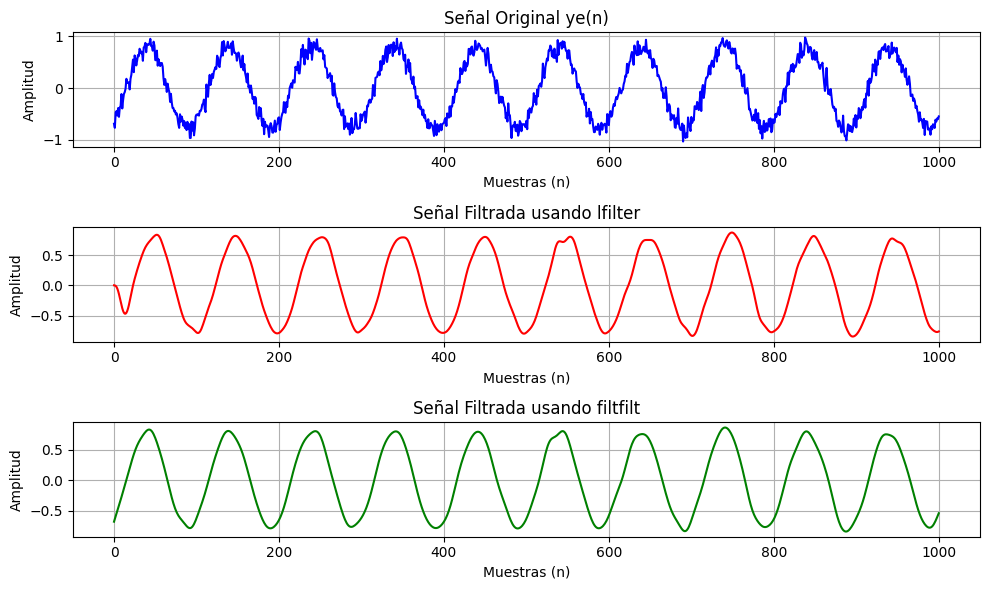

In [84]:
# Parámetros del filtro
Fc = 1.25  # Frecuencia de corte del filtro en Hz
N = 4  # Orden del filtro
Fs = 25  # Frecuencia de muestreo en Hz

# Normalizar la frecuencia de corte
Wn = Fc / (Fs / 2)

# Obtener los coeficientes del filtro pasa bajas Butterworth
b_lowpass, a_lowpass = iirfilter(N, Wn, btype='low', analog=False, ftype='butter')

# Señal y_e(n) (la que me entregaste al principio)
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Filtrado de la señal usando lfilter
ye_filtrada_lfilter = lfilter(b_lowpass, a_lowpass, ye)

# Filtrado de la señal usando filtfilt
ye_filtrada_filtfilt = filtfilt(b_lowpass, a_lowpass, ye)

# Gráficos
plt.figure(figsize=(10, 6))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando lfilter
plt.subplot(3, 1, 2)
plt.plot(n, ye_filtrada_lfilter, label='ye_filtrada_lfilter(n)', color='red')
plt.title('Señal Filtrada usando lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando filtfilt
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_filtfilt, label='ye_filtrada_filtfilt(n)', color='green')
plt.title('Señal Filtrada usando filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


Si se mantuviese el mismo orden inicial (N = 30) se obtendría un grafico desproporcionado de la señal filtrada. Esto puede deberse a:

**- Respuesta al impulso:** Los filtros IIR pueden tener una respuesta al impulso más larga que los filtros FIR, especialmente cuando el orden del filtro es alto. Esto puede resultar en una mayor duración de los efectos de borde en el filtrado, lo que podría afectar la forma y el tamaño de la señal filtrada.

**- Estabilidad del filtro:** Los filtros IIR pueden ser menos estables que los filtros FIR, especialmente cuando se utilizan órdenes altos. La inestabilidad puede provocar efectos no deseados en la señal filtrada, como amplificación de ruido o distorsión.

**- Precisión numérica:** Los cálculos numéricos involucrados en el filtrado de señales con filtros IIR pueden ser más sensibles a problemas de precisión numérica que los filtros FIR, especialmente cuando se utilizan órdenes altos. Esto podría resultar en comportamientos inesperados o desproporcionados en la señal filtrada.

**- Diseño del filtro:** La elección de la especificación y diseño del filtro (como el tipo de filtro, la frecuencia de corte, etc.) puede influir en el comportamiento del filtro y en la señal filtrada resultante.

Esto se muestra a continuación:

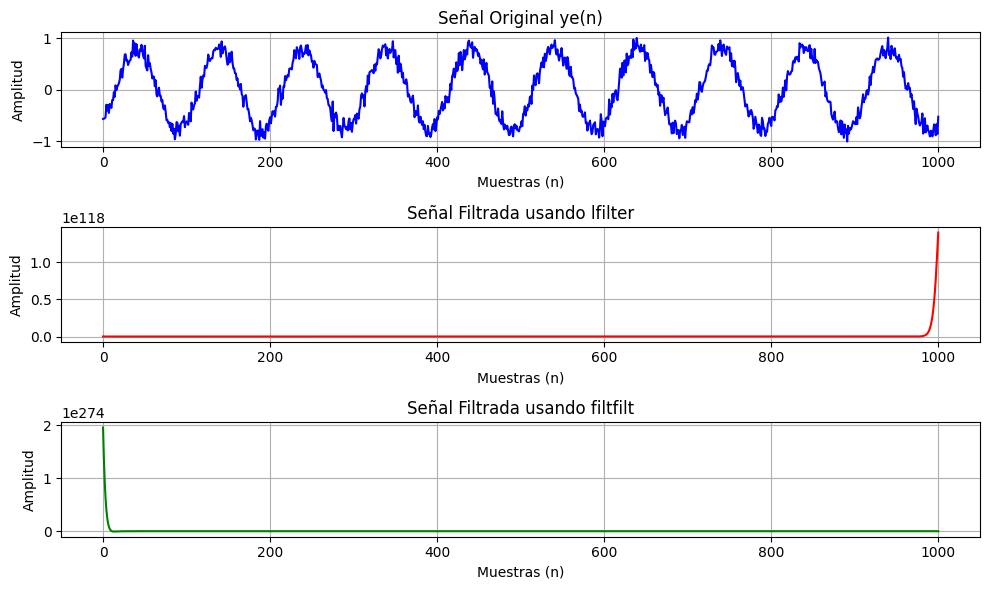

In [85]:
# Parámetros del filtro
Fc = 1.25  # Frecuencia de corte del filtro en Hz
N = 30  # Orden del filtro
Fs = 25  # Frecuencia de muestreo en Hz

# Normalizar la frecuencia de corte
Wn = Fc / (Fs / 2)

# Obtener los coeficientes del filtro pasa bajas Butterworth
b_lowpass, a_lowpass = iirfilter(N, Wn, btype='low', analog=False, ftype='butter')

# Señal y_e(n) (la que me entregaste al principio)
n = np.arange(0, 1001)  # Vector de tiempo
F0 = 0.01  # Frecuencia de la señal sinusoidal en Hz
alpha = 0.8  # Amplitud
D = 15  # Retraso en muestras
sigma = 0.1  # Desviación estándar del ruido gaussiano
ye = alpha * np.sin(2 * np.pi * F0 * (n - D)) + np.random.normal(0, sigma, len(n))

# Filtrado de la señal usando lfilter
ye_filtrada_lfilter = lfilter(b_lowpass, a_lowpass, ye)

# Filtrado de la señal usando filtfilt
ye_filtrada_filtfilt = filtfilt(b_lowpass, a_lowpass, ye)

# Gráficos
plt.figure(figsize=(10, 6))

# Señal original y_e(n)
plt.subplot(3, 1, 1)
plt.plot(n, ye, label='ye(n)', color='blue')
plt.title('Señal Original ye(n)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando lfilter
plt.subplot(3, 1, 2)
plt.plot(n, ye_filtrada_lfilter, label='ye_filtrada_lfilter(n)', color='red')
plt.title('Señal Filtrada usando lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal filtrada usando filtfilt
plt.subplot(3, 1, 3)
plt.plot(n, ye_filtrada_filtfilt, label='ye_filtrada_filtfilt(n)', color='green')
plt.title('Señal Filtrada usando filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# **4.4 Aplicación**

Cargue  la  señal señal_filtros.txt adquirida  a  una  frecuencia  de  muestreo  de 500Hz. Extraiga y trabaje con el canal 1 de la señal.

In [58]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar la señal desde el archivo señal_filtros.txt
data = np.loadtxt('/content/drive/MyDrive/Practica 6/senal_filtros.txt')

# Extraer el canal 1 de la señal
canal_1 = data[:, 0]

# Frecuencia de muestreo de la señal
fs = 500  # Hz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Realice   un   análisis   frecuencial   con   la   función   que   permite   calcular   el periodograma de Welch de una señal¿Hay presencia de ruido eléctrico? Analice.

**Sin ventana específica:**

nperseg=1024: La longitud de cada segmento de señal utilizada para calcular el periodograma de Welch. En este caso, se están utilizando segmentos de 1024 muestras.
Esta llamada calcula el periodograma de Welch utilizando segmentos de señal de 1024 muestras sin superposición entre segmentos.

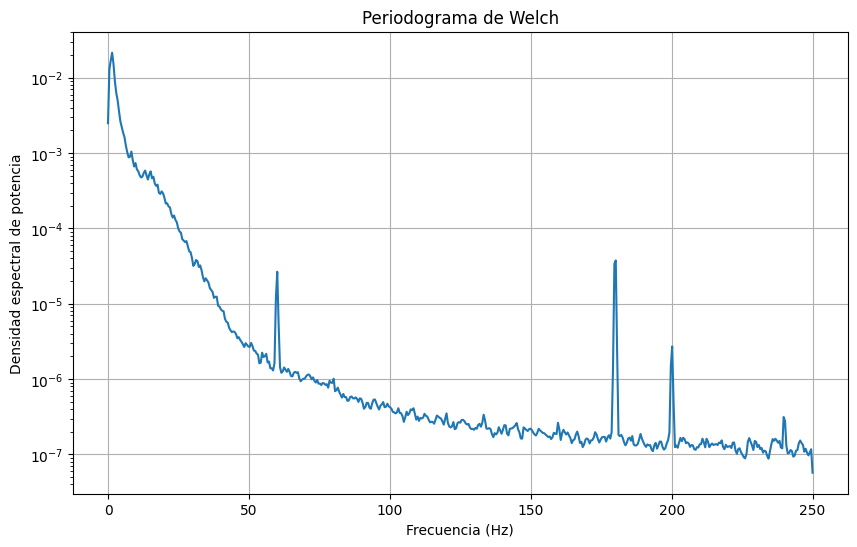

In [90]:
# Calcular el periodograma de Welch
frecuencias, Pxx = welch(canal_1, fs, nperseg=1024)

# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(frecuencias, Pxx)
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


**Con ventana específica:**

window='hann': La ventana utilizada para suavizar los segmentos de señal antes de calcular el periodograma de Welch. En este caso, se está utilizando la ventana de Hann.

 nperseg=200: La longitud de cada segmento de señal utilizada para calcular el periodograma de Welch. En este caso, se están utilizando segmentos de 200 muestras.

 noverlap=100: La cantidad de superposición entre segmentos de señal. En este caso, se superponen 100 muestras entre segmentos.

 Calculamos el periodograma de Welch utilizando segmentos de señal de 200 muestras con una superposición de 100 muestras entre segmentos, y utilizamos la ventana de Hann para suavizar los segmentos de señal antes de calcular el periodograma de Welch.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


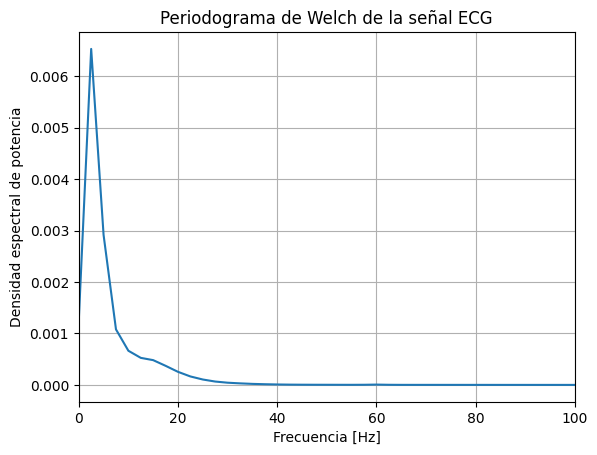

In [60]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar la señal desde el archivo señal_filtros.txt
data = np.loadtxt('/content/drive/MyDrive/Practica 6/senal_filtros.txt')

# Extraer el canal 1 de la señal
canal_1 = data[:, 0]

# Frecuencia de muestreo de la señal
fs = 500  # Hz

f,Pxx=welch(canal_1,fs=fs,window='hann',nperseg=200,noverlap=100)

plt.plot(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal ECG')
plt.grid()
plt.xlim(0, 100)
plt.show()


Al visualizar el periodograma se observa un pico en la frecuencia alrededor de los 5 Hz, lo que indica la presencia de ruido en la señal.

* Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique.  Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

**Sin ventana específica:**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


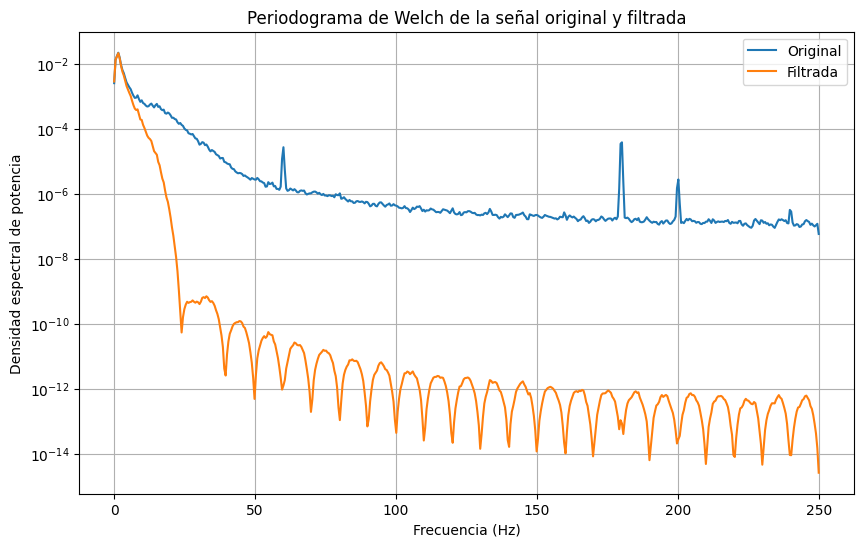

In [61]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar la señal desde el archivo señal_filtros.txt
data = np.loadtxt('/content/drive/MyDrive/Practica 6/senal_filtros.txt')
# Extraer el canal 1 de la señal
canal_1 = data[:, 0]

# Frecuencia de muestreo de la señal
fs = 500  # Hz

# Calcular el periodograma de Welch de la señal original
frecuencias_orig, Pxx_orig = welch(canal_1, fs, nperseg=1024)

# Identificar la frecuencia del ruido que deseas filtrar (por ejemplo, 5 Hz)
frecuencia_ruido = 5  # Hz

# Diseñar un filtro FIR para eliminar el ruido
# La frecuencia de corte del filtro se puede ajustar según la frecuencia del ruido que deseas filtrar
Fc_filtro = frecuencia_ruido / (fs / 2)
orden_filtro = 50  # Orden del filtro FIR
coeficientes_filtro = firwin(orden_filtro, Fc_filtro)

# Aplicar el filtro FIR a la señal para filtrar el ruido
canal_filtrado = lfilter(coeficientes_filtro, 1, canal_1)

# Calcular el periodograma de Welch de la señal filtrada
frecuencias_filtradas, Pxx_filtrado = welch(canal_filtrado, fs, nperseg=1024)

# Graficar el periodograma de Welch de la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.semilogy(frecuencias_orig, Pxx_orig, label='Original')
plt.semilogy(frecuencias_filtradas, Pxx_filtrado, label='Filtrada')
plt.title('Periodograma de Welch de la señal original y filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.legend()
plt.grid(True)
plt.show()


**Con ventana específica:**

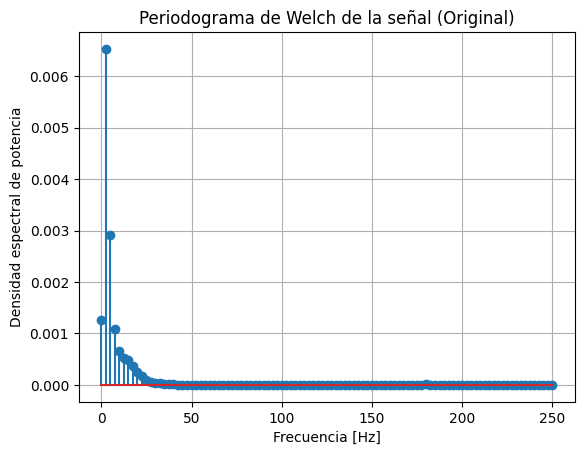

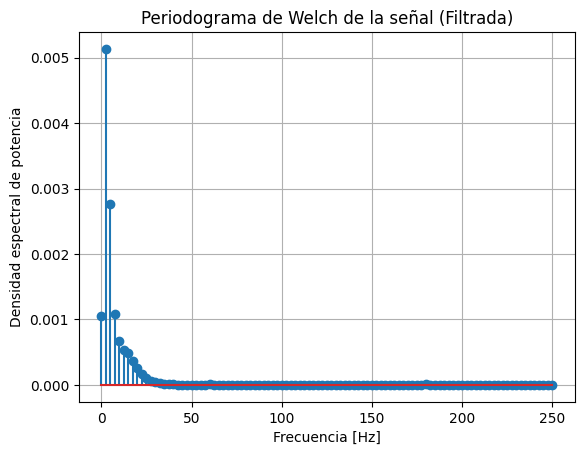

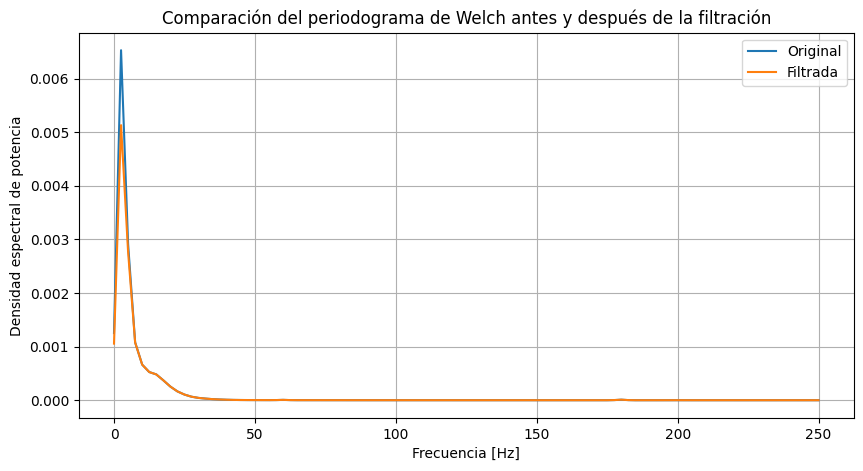

In [89]:
# Determinar si es necesario eliminar ruido (observando el periodograma)
# Calcular el periodograma de Welch de la señal original
f_orig, Pxx_orig = welch(canal_1, fs=fs, window='hann', nperseg=200, noverlap=100)

# Graficar el periodograma de Welch de la señal original
plt.stem(f_orig,Pxx_orig)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal (Original)')
plt.grid()
plt.show()

# Analizar el periodograma para determinar si es necesario eliminar ruido
# Por ejemplo, buscar picos significativos en el espectro que puedan indicar ruido

# Supongamos que decides que es necesario eliminar ruido

# Aplicar transformada de Fourier a la señal
canal_1f = np.fft.fft(canal_1)

# Aplicar filtro eliminando componentes de frecuencia entre 50 Hz y 200 Hz
canal_1f[50:200] = 0

# Obtener la señal filtrada en el dominio del tiempo
xreg = np.fft.ifft(canal_1f)

# Calcular el periodograma de Welch de la señal filtrada
f_filt, Pxx_filt = welch(np.real(xreg), fs=fs, window='hann', nperseg=200, noverlap=100)

# Graficar el periodograma de Welch de la señal filtrada
plt.stem(f_filt,Pxx_filt)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal (Filtrada)')
plt.grid()
plt.show()

# Comparar el periodograma de Welch antes y después de la filtración
# Puedes visualizar ambos periodogramas en la misma gráfica para comparar
plt.figure(figsize=(10, 5))
plt.plot(f_orig, Pxx_orig, label='Original')
plt.plot(f_filt, Pxx_filt, label='Filtrada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación del periodograma de Welch antes y después de la filtración')
plt.legend()
plt.grid()
plt.show()


La densidad espectral de potencia disminuyó en la frecuencia del ruido después de aplicar el filtro FIR, eso sugiere que el filtro ha sido efectivo para atenuar o eliminar las componentes de frecuencia no deseadas, como el ruido, en esa frecuencia específica. Esto es un resultado deseado y muestra que el filtro está cumpliendo su función de reducir el ruido en la señal.

* Grafique un segmento  de  las  señales antes  y  después  de  filtrar,  analice  los cambios.

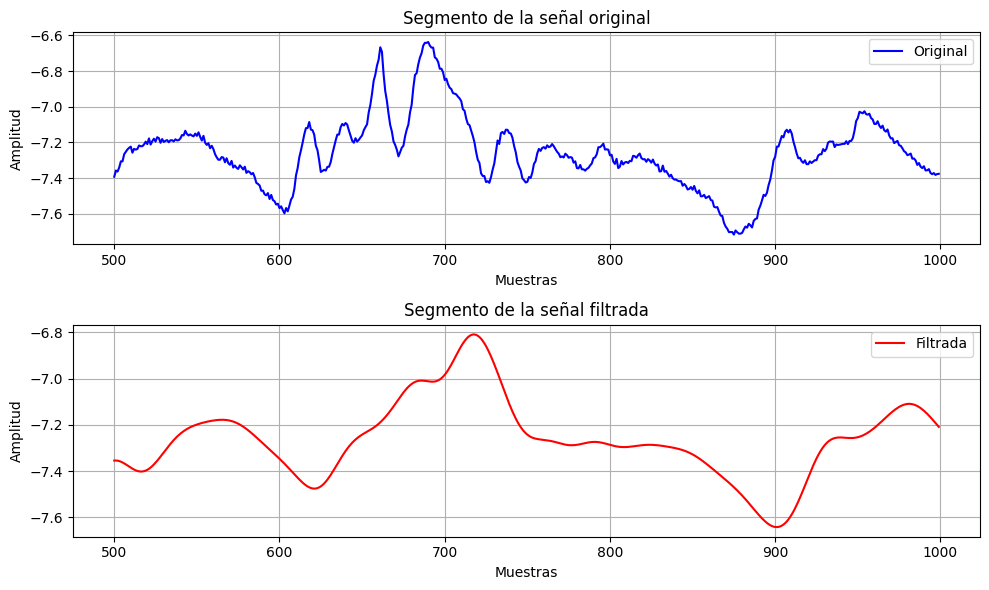

In [62]:
# Definir el índice del segmento a graficar
inicio_segmento = 500
fin_segmento = 1000

# Segmento de la señal original
segmento_original = canal_1[inicio_segmento:fin_segmento]

# Frecuencia de muestreo de la señal
fs = 500  # Hz

# Diseñar un filtro FIR para eliminar el ruido
Fc_filtro = 5 / (fs / 2)  # Frecuencia de corte del filtro FIR
orden_filtro = 50  # Orden del filtro FIR
coeficientes_filtro = firwin(orden_filtro, Fc_filtro)

# Aplicar el filtro FIR a la señal para filtrar el ruido
canal_filtrado = lfilter(coeficientes_filtro, 1, canal_1)

# Segmento de la señal filtrada
segmento_filtrado = canal_filtrado[inicio_segmento:fin_segmento]

# Graficar el segmento de la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(inicio_segmento, fin_segmento), segmento_original, label='Original', color='blue')
plt.title('Segmento de la señal original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(inicio_segmento, fin_segmento), segmento_filtrado, label='Filtrada', color='red')
plt.title('Segmento de la señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Se evidencia una mejora en la suavidad y la reducción del ruido en la señal filtrada. Estos son resultados deseables después de aplicar un filtro para eliminar el ruido de la señal. La suavización de la señal y la reducción del ruido indican que el filtro FIR ha sido efectivo para atenuar las componentes de frecuencia no deseadas, como el ruido, sin afectar significativamente las componentes de frecuencia de interés en la señal.

La reducción del ruido en la señal filtrada puede hacer que sea más fácil identificar y analizar las características importantes de la señal de interés. Esto es especialmente útil en aplicaciones donde se requiere una precisión y una calidad de señal alta.

# **Conclusiones:**

* Análisis frecuencial con el periodograma de Welch: El periodograma de Welch es una herramienta útil para analizar la densidad espectral de potencia de una señal. Puede proporcionar información sobre las componentes de frecuencia presentes en la señal y ayudar a identificar la presencia de ruido u otras interferencias.

* Diseño y aplicación de filtros FIR: Los filtros FIR son eficaces para filtrar señales y eliminar componentes de frecuencia no deseadas, como el ruido. Diseñar un filtro FIR adecuado implica seleccionar parámetros como la frecuencia de corte y el orden del filtro para satisfacer las necesidades específicas de la aplicación.

* Evaluación de la efectividad del filtrado: Después de aplicar un filtro, es importante evaluar su efectividad en la reducción del ruido y la preservación de las características importantes de la señal. Esto se puede hacer mediante la comparación de la señal antes y después del filtrado, así como mediante el análisis de la densidad espectral de potencia de la señal filtrada.

* Optimización y ajuste del filtrado: El proceso de filtrado puede requerir ajustes y optimizaciones para lograr el resultado deseado. Experimentar con diferentes parámetros de filtro y técnicas de filtrado puede ayudar a mejorar la efectividad del filtrado y garantizar que se mantenga la calidad de la señal de interés.